# Lab - Movie (Graph) Analysis [Lecture 28]


In [61]:
import json
import networkx as nx
import matplotlib.pyplot as plt

plt.style.use('ggplot')

## Step 1: Ingest the Data

In [62]:
def read_movie_data(file_path):
    movie_list = []
    with open(file_path, 'r', errors='ignore') as file:
        for line in file:
            line = line.strip()
            try:
                movie = json.loads(line)
                movie_list.append(movie)
            except json.JSONDecodeError:
                continue
    return movie_list


# Replace 'movies.json' with the actual path to your data file.
movies = read_movie_data('imdbClean.json')


In [63]:
def filter_us_movies(movie_list):
    us_movies = [
        movie for movie in movie_list if 'Country' in movie and movie['Country'] == 'USA']
    return us_movies


us_movies = filter_us_movies(movies)


In [64]:
total_movies = len(movies)
us_movies_count = len(us_movies)

print(f"Total number of movies: {total_movies}")
print(f"Number of US movies: {us_movies_count}")


Total number of movies: 115056
Number of US movies: 40260


## Step 2: Kevin Bacon

### Which actor has been in the most movies?

In [65]:
actors_graph = nx.Graph()

def build_actors_graph(actors_graph, movie_list):
    for movie in movie_list:
        actors = movie['Actors'].split(', ')
        # Filter out any actor named 'N/A' from the actors list
        actors = [actor for actor in actors if actor != 'N/A']
        for actor in actors:
            actors_graph.add_node(actor)
            for costar in actors:
                if actor != costar:
                    actors_graph.add_edge(actor, costar)

# Assuming you have already defined `us_movies` list containing movie data
build_actors_graph(actors_graph, us_movies)


In [66]:

# Calculate the degree of each node in the graph (number of costars)
actors_degrees = actors_graph.degree()

# Find the maximum degree (most edges)
max_degree = max(actors_degrees, key=lambda x: x[1])[1]

# Find all actors with the maximum degree (most edges)
actors_with_most_edges = [actor for actor,
                          degree in actors_degrees if degree == max_degree]

print(f"The actors with the most costars (edges) are:")
for actor in actors_with_most_edges:
    print(f"{actor} - Number of costars: {max_degree}")


The actors with the most costars (edges) are:
John Wayne - Number of costars: 269


### How many movies was Kevin Bacon in? How many costars has he had?

In [67]:

def count_kevin_bacon_movies(movie_list):
    kevin_bacon_movies_count = 0

    for movie in movie_list:
        actors = movie['Actors'].split(', ')
        if 'Kevin Bacon' in actors:
            kevin_bacon_movies_count += 1
    return kevin_bacon_movies_count


kevin_bacon_movies_count = count_kevin_bacon_movies(us_movies)

number_of_costars = actors_graph.degree('Kevin Bacon')

print(f"Kevin Bacon was in {kevin_bacon_movies_count} movies.")
print(f"Kevin Bacon had {number_of_costars} costars.")


Kevin Bacon was in 45 movies.
Kevin Bacon had 101 costars.


### What is the median number of costars an actor has had?

The median number of costars an actor has had is: 3


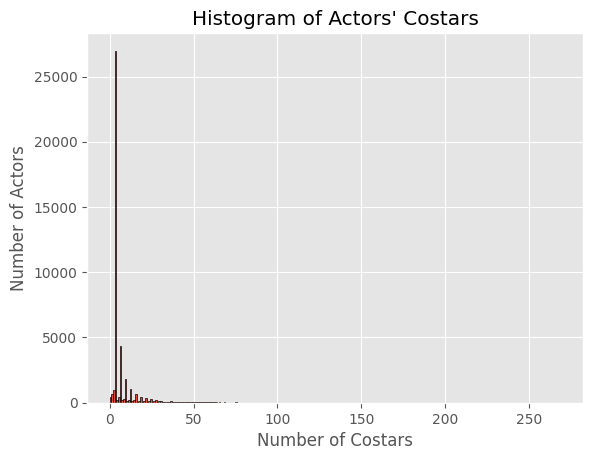

In [68]:

actors_degrees = dict(actors_graph.degree())

degrees_list = list(actors_degrees.values())

sorted_degrees = sorted(degrees_list)

num_actors = len(sorted_degrees)

if num_actors % 2 == 0:
    median_index = num_actors // 2
    median_costars = (
        sorted_degrees[median_index] + sorted_degrees[median_index - 1]) / 2
else:
    median_index = (num_actors - 1) // 2
    median_costars = sorted_degrees[median_index]

print(f"The median number of costars an actor has had is: {median_costars}")

plt.hist(degrees_list, bins=range(min(degrees_list),
         max(degrees_list) + 1, 1), edgecolor='black')
plt.xlabel("Number of Costars")
plt.ylabel("Number of Actors")
plt.title("Histogram of Actors' Costars")
plt.show()

### Is the "6 degrees of separation" from Kevin Bacon theory true? If not, provide counterexamples.

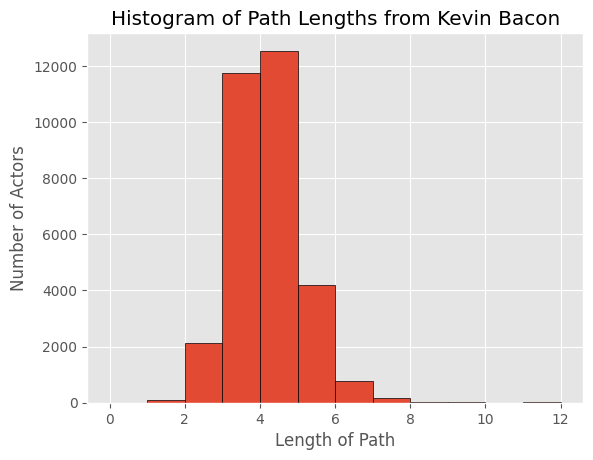

In [69]:

path_lengths = nx.shortest_path_length(actors_graph, source='Kevin Bacon')

path_lengths_list = list(path_lengths.values())


plt.hist(path_lengths_list, bins=range(min(path_lengths_list),
             max(path_lengths_list) + 1, 1), edgecolor='black')
plt.xlabel("Length of Path")
plt.ylabel("Number of Actors")
plt.title("Histogram of Path Lengths from Kevin Bacon")
plt.show()